<a href="https://colab.research.google.com/github/MithunSR/Gradient_Descent_Tutorial/blob/main/Introduction__Gradient_descent_Linear__Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction To Gradient Descent

Gradient descent is an optimization algorithm commonly used in machine learning and deep learning for finding the optimal values of parameters in a model. It is particularly effective in solving problems related to minimizing a cost or loss function.

**Gradient is the vector of partial derivatives**

One approach to maximizing a function is to
- pick a random starting point, 
- compute the gradient, 
- take a small step in the direction of the gradient, and 
- repeat with a new staring point.


##Formula

To update the parameters using gradient descent, we use the formula:

$\theta := \theta - \alpha \cdot \nabla J(\theta)$

Where:
- $\theta$ represents the parameters (weights) of the model.
- $\alpha$ denotes the learning rate, which controls the step size of the parameter updates.
- $\nabla J(\theta)$ is the gradient of the cost or loss function $J(\theta)$ with respect to the parameters $\theta$.

##Intuition

  Gradient descent works by iteratively updating the parameters in the opposite direction of the gradient. The gradient points in the direction of steepest ascent, so by subtracting the gradient multiplied by the learning rate, we move in the direction of steepest descent, aiming to reach the minimum of the cost function.

The process involves the following steps:

Initialize the parameters (θ) of the model with random or predefined values.
Calculate the gradient of the cost function (∇J(θ)) with respect to the parameters.
Update the parameters (θ) by subtracting the gradient multiplied by the learning rate.
Repeat steps 2 and 3 until convergence or a maximum number of iterations is reached.
By iteratively updating the parameters based on the gradient, gradient descent gradually approaches the minimum of the cost function, optimizing the model's performance.

#Implementing gradient descent for a simple linear regression problem.

##Import libraries

In this section, we import the necessary libraries: numpy for numerical computations, matplotlib.pyplot for data visualization, and load_boston from sklearn.datasets to load the Boston Housing dataset.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


##Load dataset

In this section, we import the necessary libraries: numpy for numerical computations, matplotlib.pyplot for data visualization, and load_boston from sklearn.datasets to load the Boston Housing dataset.


In [16]:
# Fetching the Boston Housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Selecting a single feature (number of rooms)
X = data[:, 5]
y = target


##Plot relationships
This section creates a scatter plot to visualize the relationship between the number of rooms (X) and the housing prices (y). The scatter function from matplotlib.pyplot is used to plot the points, and xlabel, ylabel, and title functions are used to set the axis labels and title of the plot. Finally, show() is called to display the plot.

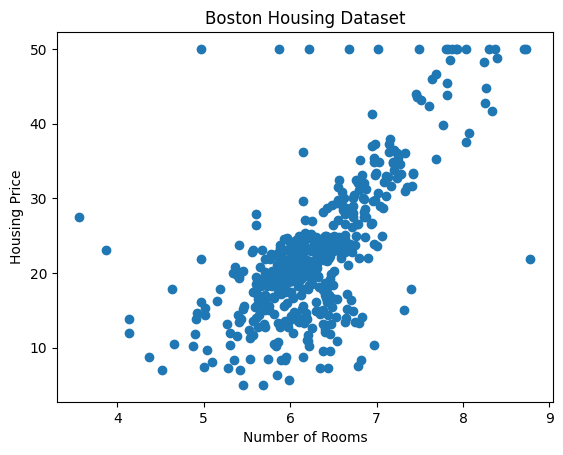

In [17]:
plt.scatter(X, y)
plt.xlabel('Number of Rooms')
plt.ylabel('Housing Price')
plt.title('Boston Housing Dataset')
plt.show()

##Define Cost Function

This function calculates the cost function, which is the mean squared error (MSE) in this case. It takes the input features X, target variable y, and parameters theta as inputs. It computes the predictions by multiplying the input features with the parameters and then calculates the cost by comparing the predictions with the actual target values.

In [18]:
def cost_function(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost


Here, we initialize the parameters theta randomly using np.random.randn(). We also add a bias term to the input features X using np.c_, which concatenates an array of ones with the input features.

In [19]:
theta = np.random.randn(2, 1)  # Random initialization
X_b = np.c_[np.ones((len(X), 1)), X]  # Adding bias term


##Implements Gradient Descent Algorithm
This function implements the gradient descent algorithm. It takes the input features X, target variable y, parameters theta, learning rate learning_rate, and number of iterations iterations as inputs. It performs the following steps iteratively:

Computes the predictions by multiplying the input features with the parameters.
Calculates the error by subtracting the predictions from the target variable.
Computes the gradient by multiplying the transpose of the input features with the error.
Updates the parameters by subtracting the learning rate multiplied by the gradient.
Calculates the cost using the cost_function.
Appends the cost to the cost_history list.
Finally, returns the optimized parameters and the history of cost values.

In [20]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        theta = theta - learning_rate * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history


**Assign Learning Rate**

In this section, we set the learning rate and the number of iterations for the gradient descent algorithm. We then call the gradient_descent function with the input features X_b, target variable y, initial parameters theta, learning rate, and iterations. The optimized parameters and the history of cost values are assigned to theta and cost_history, respectively.

In [21]:
learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)


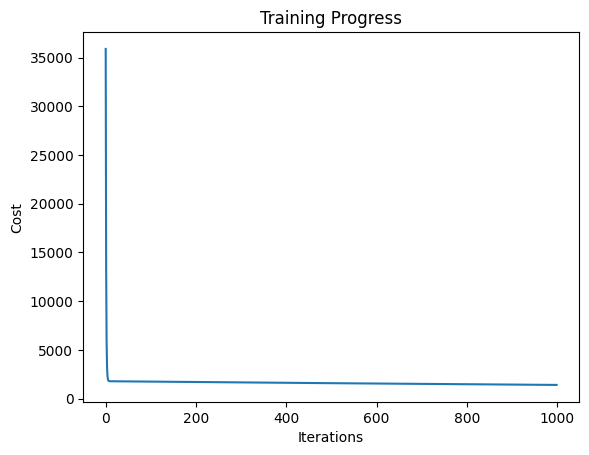

In [22]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.show()


##Create new data points
This section creates new data points (X_new) for prediction purposes. We create a matrix of new data points with values [0, 1] and concatenate an array of ones to it using np.c_. Then, we compute the predicted values (y_pred) by multiplying the new data points with the optimized parameters.

In [23]:
X_new = np.array([[0], [1]])  # New data points
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta)


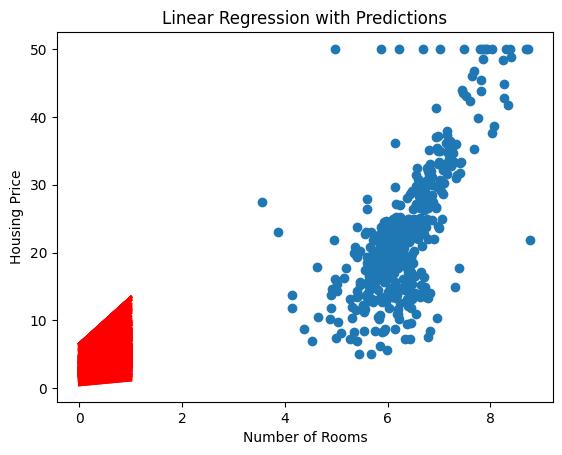

In [24]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, color='red', linewidth=2)
plt.xlabel('Number of Rooms')
plt.ylabel('Housing Price')
plt.title('Linear Regression with Predictions')
plt.show()


##Evaluate

In [25]:
mse = cost_function(X_b, y, theta)
print("Mean Squared Error:", mse)


Mean Squared Error: 1402.7018823208941
